In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from scipy import stats
plt.rcParams['font.sans-serif']=['Songti SC'] #用来正常显示中文标签


In [3]:
train_data = pd.read_csv('C:/ml_data/kdxf/train/train.csv')
test_data = pd.read_csv('C:/ml_data/kdxf/test/test.csv')
train_data.columns = ['timestamp', 'year', 'month', 'day', 'hour', 'min', 'sec', 'outtemp', 'outhum', 'outatmo',
                    'inhum', 'inatmo', 'temperature']
test_data.columns = ['timestamp', 'year', 'month', 'day', 'hour', 'min', 'sec', 'outtemp', 'outhum', 'outatmo',
                   'inhum', 'inatmo']


In [4]:
tempa_miss = [x for x in range(len(train_data['temperature'].isnull())) if train_data['temperature'].isnull()[x] == True]

In [1]:
#预测值存在缺失，直接删除

In [5]:
len_0= train_data.shape[0]
train_data = train_data.drop(axis=0,index = tempa_miss).reset_index()
len_1 = train_data.shape[0]
print('remain_ratio :',len_1/len_0)
del train_data['index']

remain_ratio : 0.9729379927050241


In [6]:
train_features_with_missing = ['outtemp','outhum','outatmo']

In [2]:
#这些特征使用上下时间点，进行线性融合填充

In [7]:
for feature_single in tqdm(train_features_with_missing):
    miss_index = [x for x in range(len(train_data[feature_single].isnull())) if train_data[feature_single].isnull()[x] == True]    
    for index in miss_index:

        value_last = train_data[feature_single][index - 1]
        j = 1
        while True:
            if train_data[feature_single][index +j] > 0:
                break
            j += 1
        ratio_ = (train_data['timestamp'][index] - train_data['timestamp'][index-1])/(train_data['timestamp'][index+j] - train_data['timestamp'][index-1])
        train_data[feature_single][index] = ratio_*(train_data[feature_single][index +j] - train_data[feature_single][index - 1] ) + train_data[feature_single][index - 1]  

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:39<00:00, 13.09s/it]


In [8]:
test_features_with_missing = ['outtemp','outhum','outatmo','inhum','inatmo']

In [3]:
#特征还是按照时间融合填充

In [9]:
for feature_single in tqdm(test_features_with_missing):
    miss_index = [x for x in range(len(test_data[feature_single].isnull())) if test_data[feature_single].isnull()[x] == True]    
    for index in miss_index:

        value_last = test_data[feature_single][index - 1]
        j = 1
        while True:
            if test_data[feature_single][index +j] > 0:
                break
            j += 1
        ratio_ = (test_data['timestamp'][index] - test_data['timestamp'][index-1])/(test_data['timestamp'][index+j] - test_data['timestamp'][index-1])
        test_data[feature_single][index] = ratio_*(test_data[feature_single][index +j] - test_data[feature_single][index - 1] ) + test_data[feature_single][index - 1]  

  0%|                                                                                            | 0/5 [00:00<?, ?it/s]C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 13.05it/s]


In [10]:
#timestamp_start = train_data['timestamp'][0]
#train_data['timestamp'] = train_data['timestamp'] - timestamp_start
#test_data['timestamp'] = test_data['timestamp'] - timestamp_start
del train_data['timestamp'] 
del test_data['timestamp'] 

In [11]:
train_data['day'] = (train_data['month'] - 3) * 31 + train_data['day']
test_data['day'] = (test_data['month'] - 3) * 31 + test_data['day']

In [12]:
del train_data['year']
del train_data['month']

del test_data['year']
del test_data['month']


In [4]:
#预测目标从室内温度变更为室内外温差

In [13]:
train_data['gaptemp'] = train_data['temperature'] - train_data['outtemp']
del train_data['temperature']

In [14]:
train_data['min'] = train_data['hour'] * 60 + train_data['min']
test_data['min'] = test_data['hour'] * 60 + test_data['min']

In [15]:
train_data['sec'] = train_data['min'] * 60 + train_data['sec']
test_data['sec'] = test_data['min'] * 60 + test_data['sec']

In [16]:
all_data = pd.concat([train_data,test_data], axis=0, ignore_index=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [ ]:
#新建特征up_wave

In [29]:
all_data['up_wave'] = 0
temp_value = [x for x in all_data['outhum']]
all_data['up_wave'][0] = 0

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
tt = [x for x in all_data['outhum']]

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not fo

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not fo

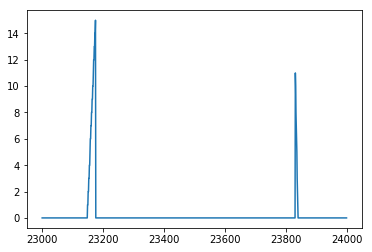

In [153]:
plt.plot(all_data['up_wave'][k*1000:k*1000+1000])

In [29]:
k = 0

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not fo

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not fo

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


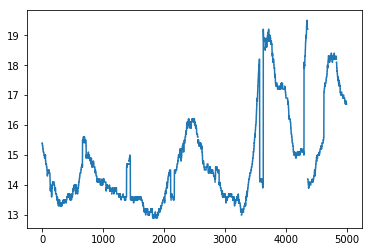

In [30]:
plt.plot( tt[k*1000:k*1000+5000])
plt.savefig('C:/ml_data/kdxf/qwe.png')

In [147]:
for i in tqdm(range(k*1000,k*1000 + 1000)):
    
    ratio =(tt[i] - tt[i-1])/tt[i] * 100
    if ratio < 2 and ratio > -2:
        continue
    else:
        print(i)
        print(ratio)
        
        continue
            

100%|██████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 334234.12it/s]

23015
-2.380952380952381
23074
-2.5
23115
-2.5974025974025974
23147
3.75
23175
-15.277777777777779
23180
-2.898550724637681
23189
2.8169014084507045
23190
-2.898550724637681
23214
-2.9850746268656714
23224
-4.615384615384616
23247
4.285714285714286
23249
-2.9850746268656714
23250
-3.076923076923077
23265
-3.076923076923077
23302
-3.125
23305
3.076923076923077
23306
-3.1746031746031744
23315
-3.1746031746031744
23337
-3.389830508474576
23343
3.225806451612903
23346
-3.389830508474576
23375
-3.225806451612903
23425
3.1746031746031744
23651
2.857142857142857
23653
-4.411764705882353
23676
2.898550724637681
23715
2.857142857142857
23814
2.857142857142857
23831
11.39240506329114
23839
2.564102564102564
23841
-2.631578947368421
23899
-2.8169014084507045


In [152]:
for i in tqdm(range(23831,23840)):
    all_data['up_wave'][i] = (1-(i-23831)/(23840-23831)) * (11.39240506329114)

  0%|                                                                                            | 0/9 [00:00<?, ?it/s]C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 18.93it/s]


In [161]:
all_data.isnull().sum()

day          0
gaptemp    406
hour         0
inatmo       0
inhum        0
min          0
outatmo      0
outhum       0
outtemp      0
sec          0
up_wave      0
dtype: int64

In [162]:
features_useful = ['inatmo','inhum','outatmo','outhum', 'outtemp']

In [163]:
#该算法无法处理第一个和最后一个数据，人工鉴定不存在这种情况
for v in [0,2]:
    feature_single = features_useful[v]
    for i in tqdm(range(1,len(all_data[feature_single])-1)):
        if 20 * abs(all_data[feature_single][i] - all_data[feature_single][i-1]) > all_data[feature_single][i-1]:
            all_data[feature_single][i] = (all_data[feature_single][i-1] +all_data[feature_single][i+1] )/2
        

  0%|                                                                                        | 0/25211 [00:00<?, ?it/s]C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
100%|███████████████████████████████████████████████████████████████████████████| 25211/25211 [00:28<00:00, 876.06it/s]


In [164]:
for v in [0,2]:
    feature_single = features_useful[v]
    for i in (range(1,len(all_data[feature_single])-1)):
        if 20 * abs(all_data[feature_single][i] - all_data[feature_single][i-1]) > all_data[feature_single][i-1]:
            print(i)

In [5]:
#正态化程度还行，不进行正态化处理了
#事后诸葛亮：其实还是应该做的

In [166]:
train_data['gaptemp'].skew()

-1.4887741645252575

In [167]:
train_data['gaptemp'].kurt()

3.352724719572008

In [168]:
all_data.columns

Index(['day', 'gaptemp', 'hour', 'inatmo', 'inhum', 'min', 'outatmo', 'outhum',
       'outtemp', 'sec', 'up_wave'],
      dtype='object')

In [169]:
all_data['gapatmo'] = all_data['inatmo'] - all_data['outatmo']
all_data['gaphum'] = all_data['inhum'] - all_data['outhum']
all_data['gapatmo_ratio'] = all_data['gapatmo'].values/all_data['outatmo'].values * 10000
all_data['gaphum_ratio'] = all_data['gaphum'].values/all_data['outhum'].values * 100


In [6]:
#聚合特征

In [170]:
group_features = []
for f in tqdm(['outtemp', 'outhum', 'outatmo', 'inhum', 'inatmo']):
    all_data['MDH_{}_medi'.format(f)] = all_data.groupby(['day', 'hour'])[f].transform('median')
    all_data['MDH_{}_mean'.format(f)] = all_data.groupby(['day', 'hour'])[f].transform('mean')
    all_data['MDH_{}_max'.format(f)] = all_data.groupby(['day', 'hour'])[f].transform('max')
    all_data['MDH_{}_min'.format(f)] = all_data.groupby(['day', 'hour'])[f].transform('min')
    all_data['MDH_{}_std'.format(f)] = all_data.groupby(['day', 'hour'])[f].transform('std')

    group_features.append('MDH_{}_medi'.format(f))
    group_features.append('MDH_{}_mean'.format(f))
all_data = all_data.fillna(method='bfill')

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 17.06it/s]


In [171]:

for f in tqdm(['gapatmo','gaphum','gapatmo_ratio','gaphum_ratio']):
    all_data['MDH_{}_medi'.format(f)] = all_data.groupby(['day', 'hour'])[f].transform('median')
    all_data['MDH_{}_mean'.format(f)] = all_data.groupby(['day', 'hour'])[f].transform('mean')
    all_data['MDH_{}_max'.format(f)] = all_data.groupby(['day', 'hour'])[f].transform('max')
    all_data['MDH_{}_min'.format(f)] = all_data.groupby(['day', 'hour'])[f].transform('min')
    all_data['MDH_{}_std'.format(f)] = all_data.groupby(['day', 'hour'])[f].transform('std')

all_data = all_data.fillna(method='bfill')

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 10.50it/s]


In [172]:
for f1 in tqdm(['outtemp', 'outhum', 'outatmo', 'inhum', 'inatmo'] + group_features):

    for f2 in ['outtemp', 'outhum', 'outatmo', 'inhum', 'inatmo'] + group_features:
        if f1 != f2:
            colname = '{}_{}_ratio'.format(f1, f2)
            all_data[colname] = all_data[f1].values / all_data[f2].values

all_data = all_data.fillna(method='bfill')


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 55.01it/s]


In [173]:
for f in ['outtemp', 'outhum', 'outatmo', 'inhum', 'inatmo','gapatmo','gaphum','gapatmo_ratio','gaphum_ratio']:
    tmp_df = pd.DataFrame()
    for t in tqdm(range(15, 45)):
        tmp = all_data[all_data['day'] < t].groupby(['hour'])[f].agg({'mean'}).reset_index()
        tmp.columns = ['hour', 'hit_{}_mean'.format(f)]
        tmp['day'] = t
        tmp_df = tmp_df.append(tmp)

    all_data = all_data.merge(tmp_df, on=['day', 'hour'], how='left')

all_data = all_data.fillna(method='bfill')


100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 24.22it/s]


In [175]:
for f in ['outtemp', 'outhum', 'outatmo', 'inhum', 'inatmo','gapatmo','gaphum','gapatmo_ratio','gaphum_ratio']:
    all_data[f + '_20_bin'] = pd.cut(all_data[f], 20, duplicates='drop').apply(lambda x: x.left).astype(int)
    all_data[f + '_50_bin'] = pd.cut(all_data[f], 50, duplicates='drop').apply(lambda x: x.left).astype(int)
    all_data[f + '_100_bin'] = pd.cut(all_data[f], 100, duplicates='drop').apply(lambda x: x.left).astype(int)
    all_data[f + '_200_bin'] = pd.cut(all_data[f], 200, duplicates='drop').apply(lambda x: x.left).astype(int)


In [176]:
for i in tqdm(['outtemp', 'outhum', 'outatmo', 'inhum', 'inatmo','gapatmo','gaphum','gapatmo_ratio','gaphum_ratio']):
    f1 = i + '_20_bin'
    for f2 in ['outtemp', 'outhum', 'outatmo', 'inhum', 'inatmo','gapatmo','gaphum','gapatmo_ratio','gaphum_ratio']:
        all_data['{}_{}_medi'.format(f1, f2)] = all_data.groupby([f1])[f2].transform('median')
        all_data['{}_{}_mean'.format(f1, f2)] = all_data.groupby([f1])[f2].transform('mean')
        all_data['{}_{}_max'.format(f1, f2)] = all_data.groupby([f1])[f2].transform('max')
        all_data['{}_{}_min'.format(f1, f2)] = all_data.groupby([f1])[f2].transform('min')

    f1 = i + '_20_bin'
    for f2 in ['outtemp', 'outhum', 'outatmo', 'inhum', 'inatmo','gapatmo','gaphum','gapatmo_ratio','gaphum_ratio']:
        all_data['{}_{}_medi'.format(f1, f2)] = all_data.groupby([f1])[f2].transform('median')
        all_data['{}_{}_mean'.format(f1, f2)] = all_data.groupby([f1])[f2].transform('mean')
        all_data['{}_{}_max'.format(f1, f2)] = all_data.groupby([f1])[f2].transform('max')
        all_data['{}_{}_min'.format(f1, f2)] = all_data.groupby([f1])[f2].transform('min')

    f1 = i + '_100_bin'
    for f2 in ['outtemp', 'outhum', 'outatmo', 'inhum', 'inatmo','gapatmo','gaphum','gapatmo_ratio','gaphum_ratio']:
        all_data['{}_{}_medi'.format(f1, f2)] = all_data.groupby([f1])[f2].transform('median')
        all_data['{}_{}_mean'.format(f1, f2)] = all_data.groupby([f1])[f2].transform('mean')
        all_data['{}_{}_max'.format(f1, f2)] = all_data.groupby([f1])[f2].transform('max')
        all_data['{}_{}_min'.format(f1, f2)] = all_data.groupby([f1])[f2].transform('min')

    f1 = i + '_200_bin'
    for f2 in ['outtemp', 'outhum', 'outatmo', 'inhum', 'inatmo','gapatmo','gaphum','gapatmo_ratio','gaphum_ratio']:
        all_data['{}_{}_medi'.format(f1, f2)] = all_data.groupby([f1])[f2].transform('median')
        all_data['{}_{}_mean'.format(f1, f2)] = all_data.groupby([f1])[f2].transform('mean')
        all_data['{}_{}_max'.format(f1, f2)] = all_data.groupby([f1])[f2].transform('max')
        all_data['{}_{}_min'.format(f1, f2)] = all_data.groupby([f1])[f2].transform('min')



100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [03:47<00:00, 25.25s/it]


In [180]:
all_data.shape

(25213, 1287)

In [181]:
train_data = all_data[0:24807]

In [182]:
test_data = all_data[24807:25213]

In [184]:
train_data.to_csv('C:/ml_data/kdxf/train_data_csdn_8.csv',index = False)

In [185]:
del test_data['gaptemp']

In [187]:
test_data.to_csv('C:/ml_data/kdxf/test_data_csdn_8.csv',index = False)